<a href="https://colab.research.google.com/github/svgoudar/data_science_tutorial/blob/main/ML/17.K_Means_clustering/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-0.62234043,  1.34815314],
       [-1.98389449, 10.66156581],
       [ 1.21770004,  0.22998165],
       ...,
       [-3.41785278,  7.24959137],
       [ 2.92926779,  0.91578827],
       [-3.49596336, -6.53305734]])

In [4]:
y

array([1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1,
       0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2,
       0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0,
       1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2,
       1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1,
       2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2,
       2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1,
       1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0,
       0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 0,

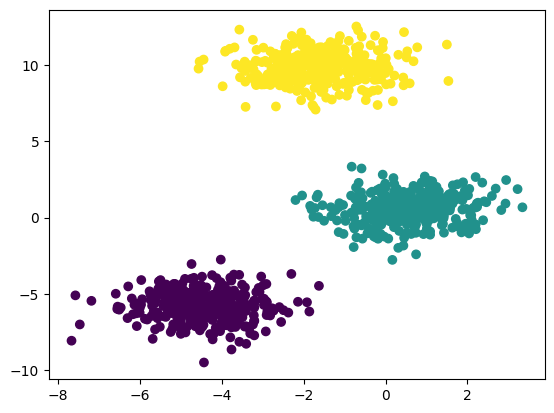

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1339.9999999999998,
 462.842269810962,
 146.4313245091714,
 120.8113375493665,
 94.01271644053735,
 63.87637415785519,
 57.091698790957416,
 49.86635295586795,
 40.52712617908767,
 37.14454423524152]

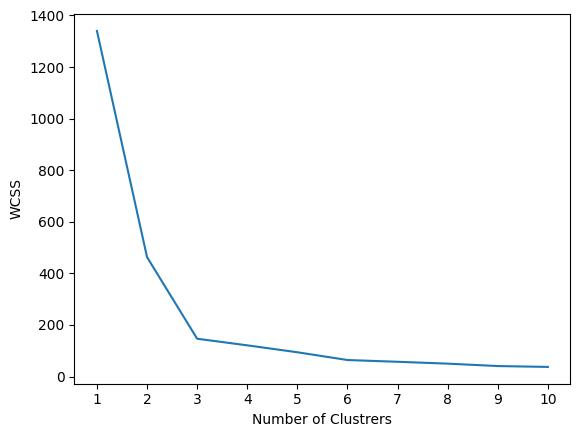

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1,
       1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0,
       0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1,
       1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1,
       1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1,
       1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1,
       1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1,
       1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1,
       1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2,

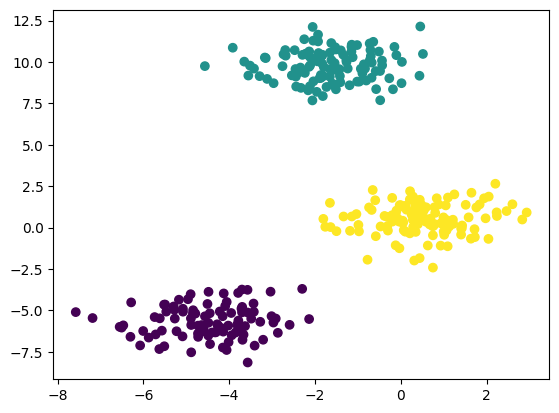

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [20]:
## kneelocator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [23]:
kl.elbow

3

In [24]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[0.6229092646632869,
 0.708224377760066,
 0.6157901104527763,
 0.5222018243526423,
 0.46792758368862125,
 0.45832003857792863,
 0.4371825020344181,
 0.4148573603978431,
 0.39883669847607617]

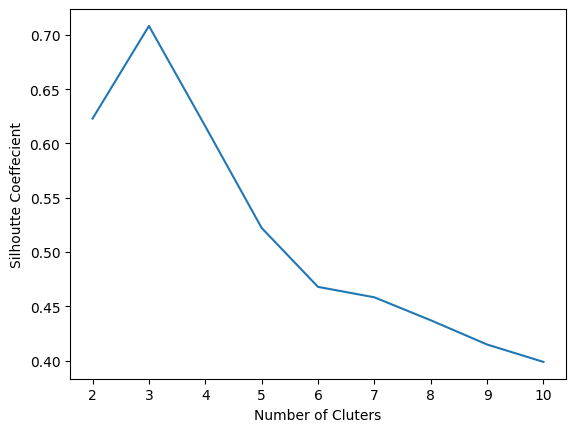

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()